In [1]:
# Import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("Clean Travel Insurance Data.csv")
df.columns

Index(['Unnamed: 0', 'Agency', 'Agency Type', 'Distribution Channel',
       'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Age'],
      dtype='object')

In [3]:
# checking the first 10 rows of the data
df.head(10)

,Unnamed: 0,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,0,3,1,0,12,0,186,79,-29.0,9.57,81
1,1,3,1,0,12,0,186,79,-29.0,9.57,71
2,2,6,1,1,16,0,65,4,-49.5,29.70,32
3,3,6,1,1,16,0,60,4,-39.6,23.76,32
4,4,6,1,1,16,0,79,61,-19.8,11.88,41
5,5,9,0,1,25,0,66,140,-121.0,42.35,44
6,6,6,1,1,16,0,47,140,-39.6,23.76,32
7,7,6,1,1,16,0,63,4,-108.9,65.34,29
8,8,6,1,1,16,0,57,129,-19.8,11.88,44
9,9,6,1,1,16,0,186,4,-99.0,59.40,37


<AxesSubplot:>

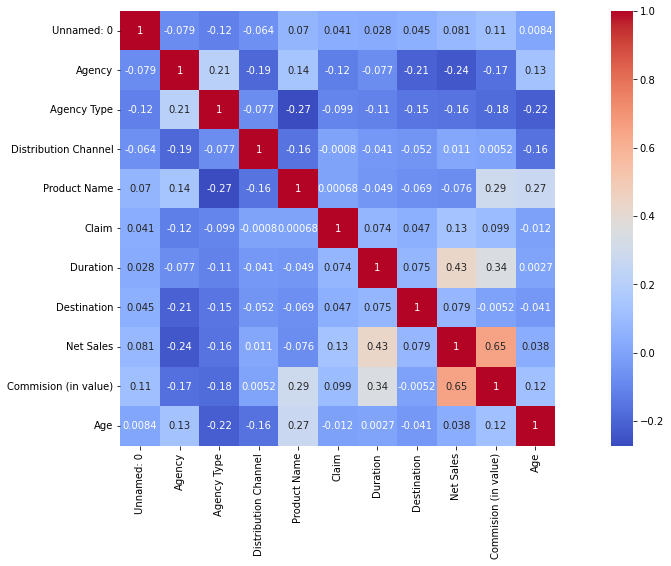

In [4]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), square=True,annot=True,cmap= 'coolwarm')

Correlation coefficient plot shows that there is no high collinearity among any of the variables. 

c:\Users\Wanern\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


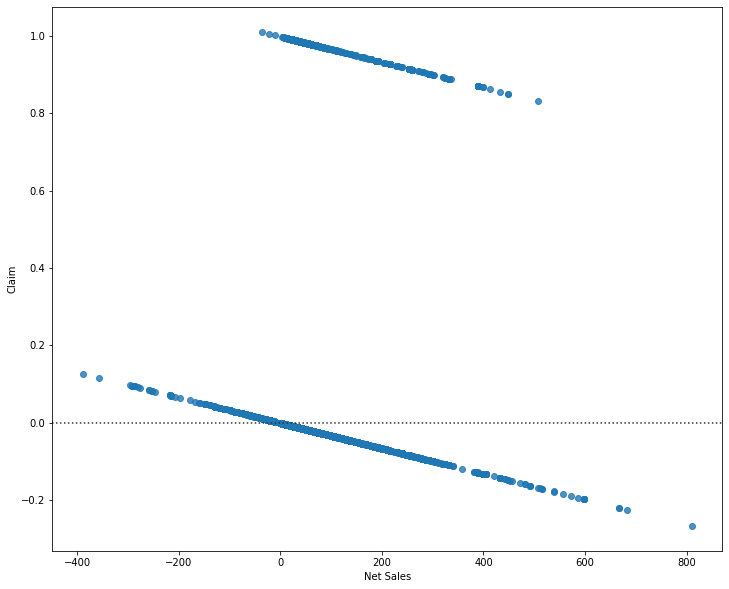

In [5]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['Net Sales'], df['Claim'])
plt.show()

Since the points does not exhibit a consistent spread around the residual = 0 line. The residual plot suggests that the error variances are not equal. That is, the assumption of equal variances is violated.
Hence, the data is not linear. Hence, Random Forest Classifier should give some prominent results.

In [6]:
y=df.iloc[:,[5]]
X=df.drop(['Claim','Unnamed: 0'], axis=1)

In [7]:
X

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,0,12,186,79,-29.0,9.57,81
1,3,1,0,12,186,79,-29.0,9.57,71
2,6,1,1,16,65,4,-49.5,29.70,32
3,6,1,1,16,60,4,-39.6,23.76,32
4,6,1,1,16,79,61,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...
63316,9,0,1,8,111,63,35.0,12.25,31
63317,9,0,1,8,58,26,40.0,14.00,40
63318,9,0,1,8,2,79,18.0,6.30,57
63319,9,0,1,8,3,145,18.0,6.30,63


In [8]:
y

,Claim
0,0
1,0
2,0
3,0
4,0
...,...
63316,0
63317,0
63318,0
63319,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

In [10]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\Wanern\AppData\Local\Temp\ipykernel_16940\3990782987.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [11]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9831022393480938


In [12]:
clf.predict([[7,1,1,1,183,57,20,0,36]])

c:\Users\Wanern\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Finding Important Features in Scikit-learn

In [13]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

C:\Users\Wanern\AppData\Local\Temp\ipykernel_16940\475071099.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier()

In [14]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [15]:
clf.feature_importances_

array([0.01937577, 0.00400233, 0.00206478, 0.03003143, 0.34676834,
       0.06639727, 0.16224652, 0.10000616, 0.2691074 ])

<BarContainer object of 9 artists>

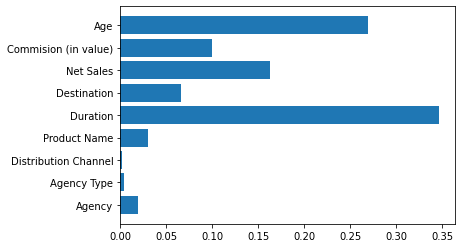

In [16]:
plt.barh(X_train.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

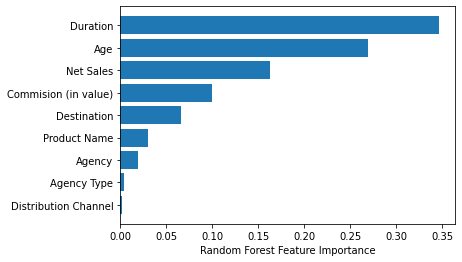

In [17]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [18]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',
ascending=False)
print(feature_importances)

                      importance
Duration                0.346768
Age                     0.269107
Net Sales               0.162247
Commision (in value)    0.100006
Destination             0.066397
Product Name            0.030031
Agency                  0.019376
Agency Type             0.004002
Distribution Channel    0.002065


#Dropping insignificant variables, (i.e. importance < 0.05)

In [19]:
y_1=df.iloc[:,[5]]
X_1=df.drop(['Claim','Unnamed: 0','Product Name','Agency','Agency Type','Distribution Channel'], axis=1)

In [20]:
X_1

,Duration,Destination,Net Sales,Commision (in value),Age
0,186,79,-29.0,9.57,81
1,186,79,-29.0,9.57,71
2,65,4,-49.5,29.70,32
3,60,4,-39.6,23.76,32
4,79,61,-19.8,11.88,41
...,...,...,...,...,...
63316,111,63,35.0,12.25,31
63317,58,26,40.0,14.00,40
63318,2,79,18.0,6.30,57
63319,3,145,18.0,6.30,63


In [21]:
y_1

,Claim
0,0
1,0
2,0
3,0
4,0
...,...
63316,0
63317,0
63318,0
63319,0


In [22]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.5, random_state=100)

In [23]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_1_train,y_1_train)

y_1_pred=clf.predict(X_1_test)

C:\Users\Wanern\AppData\Local\Temp\ipykernel_16940\2982061491.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_1_train,y_1_train)


In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_1_test, y_1_pred))

Accuracy: 0.9835760083383343


We can see the accuracy had increased slightly after removing insignificant variables

In comparison, we will remove variables with importance < 0.1

In [25]:
y_2=df.iloc[:,[5]]
X_2=df.drop(['Claim','Unnamed: 0','Product Name','Agency','Agency Type','Distribution Channel','Commision (in value)','Destination'], axis=1)

In [26]:
X_2

,Duration,Net Sales,Age
0,186,-29.0,81
1,186,-29.0,71
2,65,-49.5,32
3,60,-39.6,32
4,79,-19.8,41
...,...,...,...
63316,111,35.0,31
63317,58,40.0,40
63318,2,18.0,57
63319,3,18.0,63


In [27]:
y_2

,Claim
0,0
1,0
2,0
3,0
4,0
...,...
63316,0
63317,0
63318,0
63319,0


In [28]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.5, random_state=100)

In [29]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_2_train,y_2_train)

y_2_pred=clf.predict(X_2_test)

C:\Users\Wanern\AppData\Local\Temp\ipykernel_16940\2460742168.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_2_train,y_2_train)


In [30]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_2_test, y_2_pred))

Accuracy: 0.9830390701493952


As we can see the accuracy had decreased as we remove more variables. Thus, we can conclude our second model is the best model with highest accuracy.

In [31]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')
print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (63321, 9)
Shape of X after SMOTE: (124788, 9)

Balance of positive and negative classes (%):


Claim
0        50.0
1        50.0
dtype: float64

In [32]:
X_sm

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,0,12,186,79,-29.000000,9.570000,81
1,3,1,0,12,186,79,-29.000000,9.570000,71
2,6,1,1,16,65,4,-49.500000,29.700000,32
3,6,1,1,16,60,4,-39.600000,23.760000,32
4,6,1,1,16,79,61,-19.800000,11.880000,41
...,...,...,...,...,...,...,...,...,...
124783,2,0,1,9,2,118,13.500000,3.380000,37
124784,7,1,1,10,92,98,20.586039,0.000000,36
124785,7,1,1,16,11,59,55.166978,33.902413,34
124786,2,0,1,17,3,118,16.977393,4.247173,36


In [33]:
y_sm

,Claim
0,0
1,0
2,0
3,0
4,0
...,...
124783,1
124784,1
124785,1
124786,1


In [34]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.5, random_state=100)

In [35]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_sm_train,y_sm_train)

y_sm_pred=clf.predict(X_sm_test)

C:\Users\Wanern\AppData\Local\Temp\ipykernel_16940\3115271779.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_sm_train,y_sm_train)


In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_sm_test, y_sm_pred))

Accuracy: 0.967224412603776
